# Breast Cancer Wisconsin (Original) Data Set
(https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.dummy import DummyClassifier
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Data Read and Exploration

In [2]:
br_can_df = pd.read_csv('breastCancer.csv')
print(f'Dataset has {br_can_df.shape[0]} rows and {br_can_df.shape[1]} columns. First few Columns are: \n')
br_can_df.head()

Dataset has 699 rows and 11 columns. First few Columns are: 



,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Columns
list(br_can_df.columns)

['id',
 'clump_thickness',
 'size_uniformity',
 'shape_uniformity',
 'marginal_adhesion',
 'epithelial_size',
 'bare_nucleoli',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses',
 'class']

In [4]:
# Information on Columns
br_can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### Observations:
* Dataset has 699 records.
* No Null values.
* All columns except bare nucleoli are integer.
* Overall 10 integer column and 1 object column.
* Id columns must be record identifier and can be removed due to high cardnality.
* Class column identifies if the breast cancer is bening or malignant.

In [5]:
# checking distribution of the target variables
br_can_df['class'].value_counts(normalize=True)

2    0.655222
4    0.344778
Name: class, dtype: float64

### Observation : 65% of the records are benign cancer and 35% are malignant.

In [6]:
# Describing th data
br_can_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


### Observation: Except id and class, all columns have values between 1 to 10.


In [7]:
# Exploring the only object column that shows numerical value
br_can_df['bare_nucleoli'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

### Observation : 
There are 16 records containing "?". These may be intentional or fat fingered, we dont know. Only clue we have is the values in column is between 1 to 10. Given the lack of further information on that column, following are the possible course of action
* Delete the rows ( This will reduce the record count.Last Option)
* Impute Value with Mean, Median, Mode (This is a possibility)
* Assign a new number (Out of question since value should be between 1-10).
* Assign it to the major category 1 (Easiest and most logical of all). We will choose this option

In [8]:
# Replace ? with 0
br_can_df=br_can_df.replace(to_replace="?",value=1)
br_can_df['bare_nucleoli'] = br_can_df['bare_nucleoli'].astype('int64')

In [9]:
# Replace the Benign(2) and Malignant(4) with 0 & 1 respectively
br_can_df['class'] = br_can_df['class'].map({2:0, 4:1})
br_can_df['class'].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: class, dtype: float64

In [10]:
br_can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 699 non-null    int64
 1   clump_thickness    699 non-null    int64
 2   size_uniformity    699 non-null    int64
 3   shape_uniformity   699 non-null    int64
 4   marginal_adhesion  699 non-null    int64
 5   epithelial_size    699 non-null    int64
 6   bare_nucleoli      699 non-null    int64
 7   bland_chromatin    699 non-null    int64
 8   normal_nucleoli    699 non-null    int64
 9   mitoses            699 non-null    int64
 10  class              699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [11]:
# Describing th data again after above changes
br_can_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


## Exploratory Data Analysis - Univariate

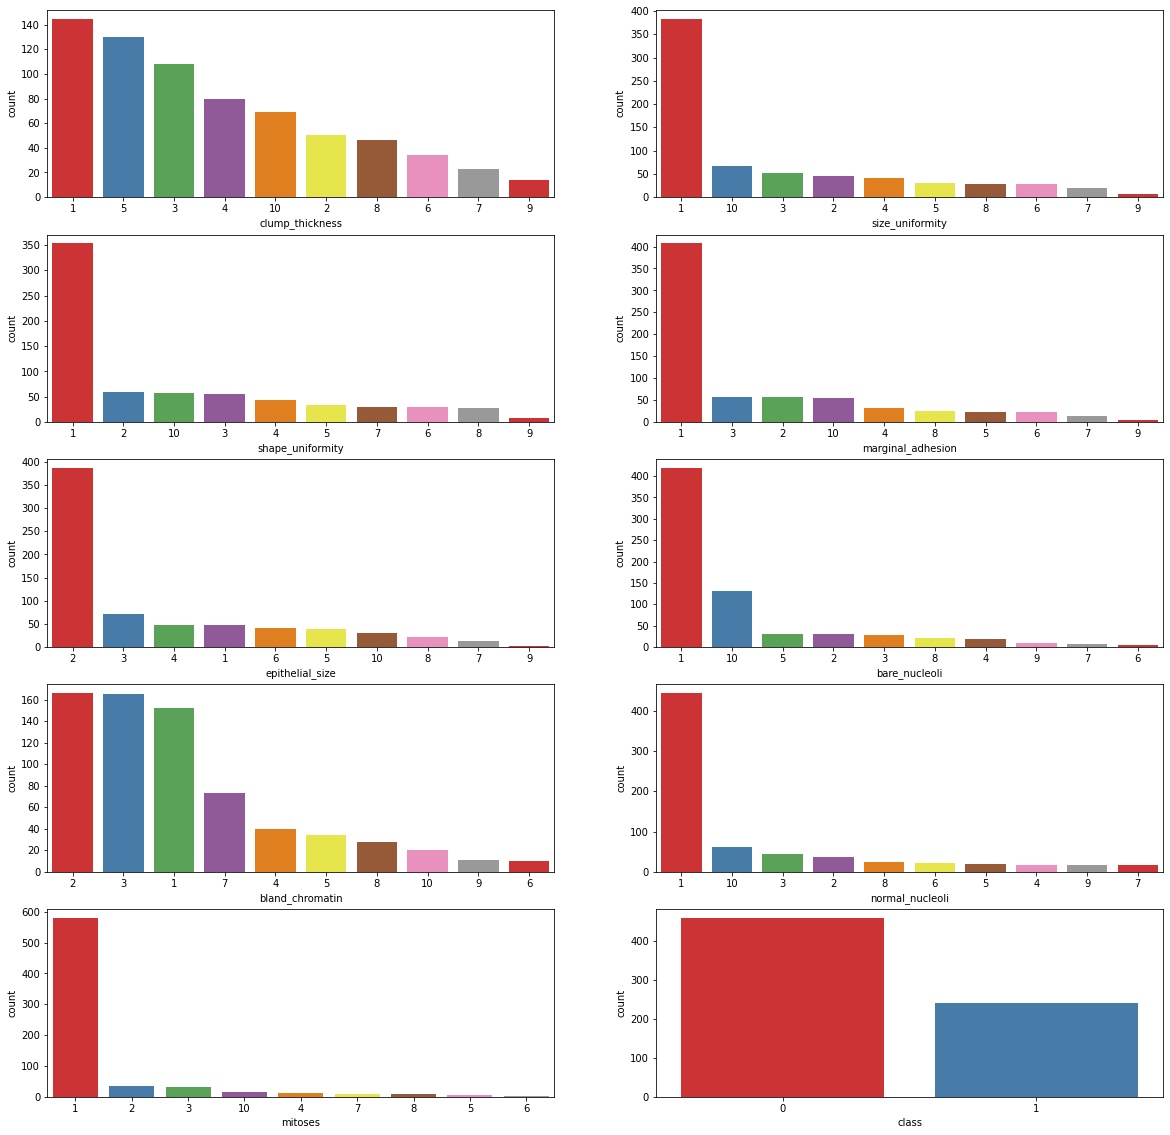

In [16]:
columns_list = list(br_can_df.columns)
columns_list.remove('id')
rows = 5 ; columns = 2
cat_cols_np_arr = np.array(columns_list).reshape(5, 2)

f, axes = plt.subplots(rows, columns, figsize=(20, 20))
for row in range(rows):
    for column in range(columns):
        sns.countplot(data = br_can_df,
                      x = cat_cols_np_arr[row][column], 
                      order = br_can_df[cat_cols_np_arr[row][column]].value_counts().index,
                      palette = "Set1", 
                      ax = axes[row, column])

## Exploratory Data Analysis - Bi-Variate

In [25]:
columns_list = list(br_can_df.columns)
columns_list.remove('id')
columns_list.remove('class')
columns_list

['clump_thickness',
 'size_uniformity',
 'shape_uniformity',
 'marginal_adhesion',
 'epithelial_size',
 'bare_nucleoli',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses']

<Figure size 1440x1440 with 0 Axes>

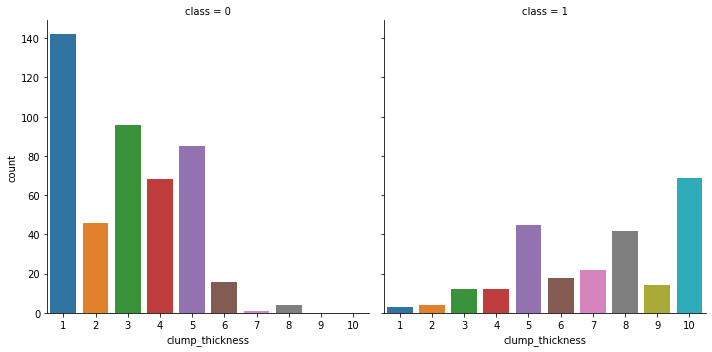

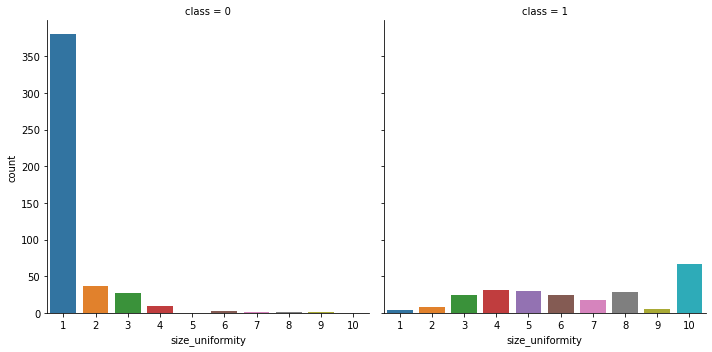

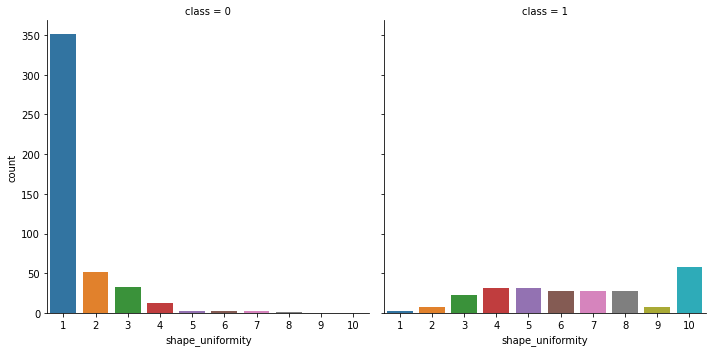

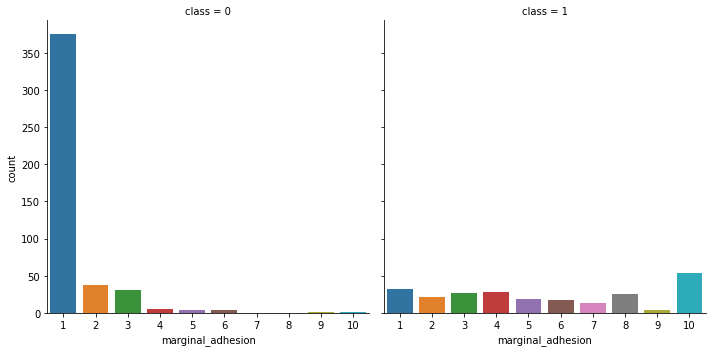

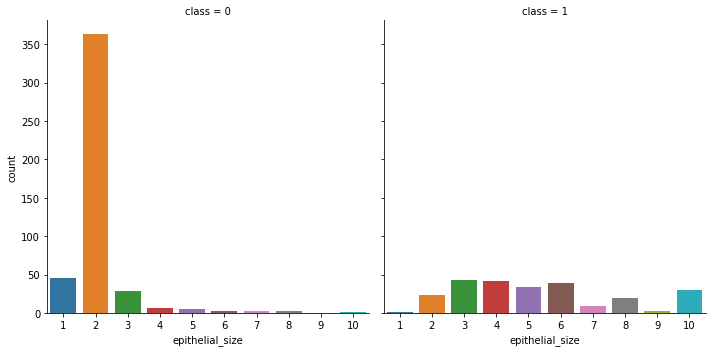

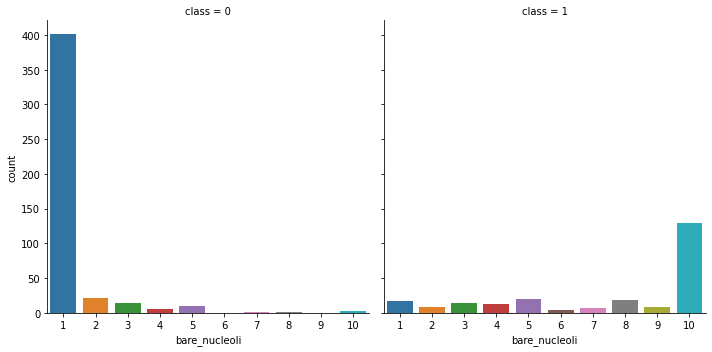

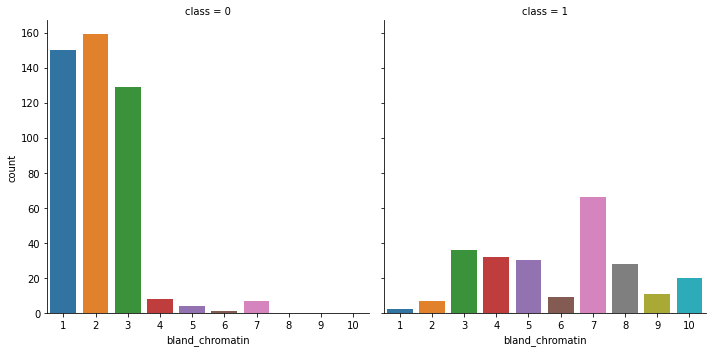

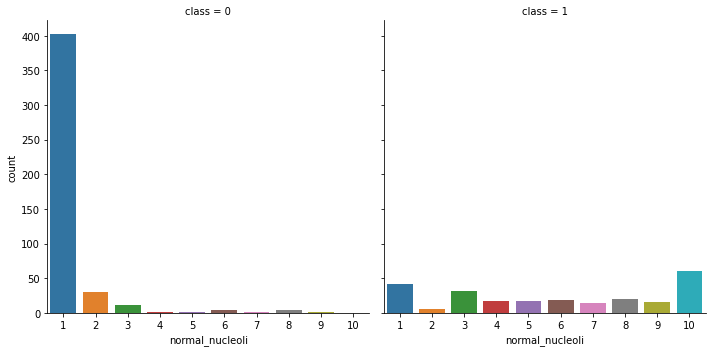

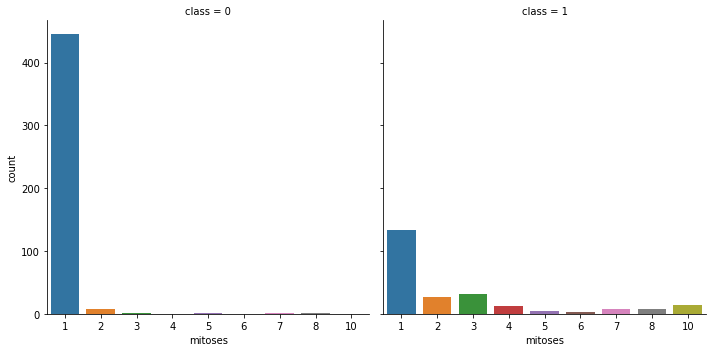

In [26]:
plt.figure(figsize=(20, 20))
for column in columns_list:
    # for column in range(columns):
    sns.catplot(data = br_can_df,
                x = column, 
                col = 'class',
                kind='count')

## Exploratory Data Analysis - Multi-Variate

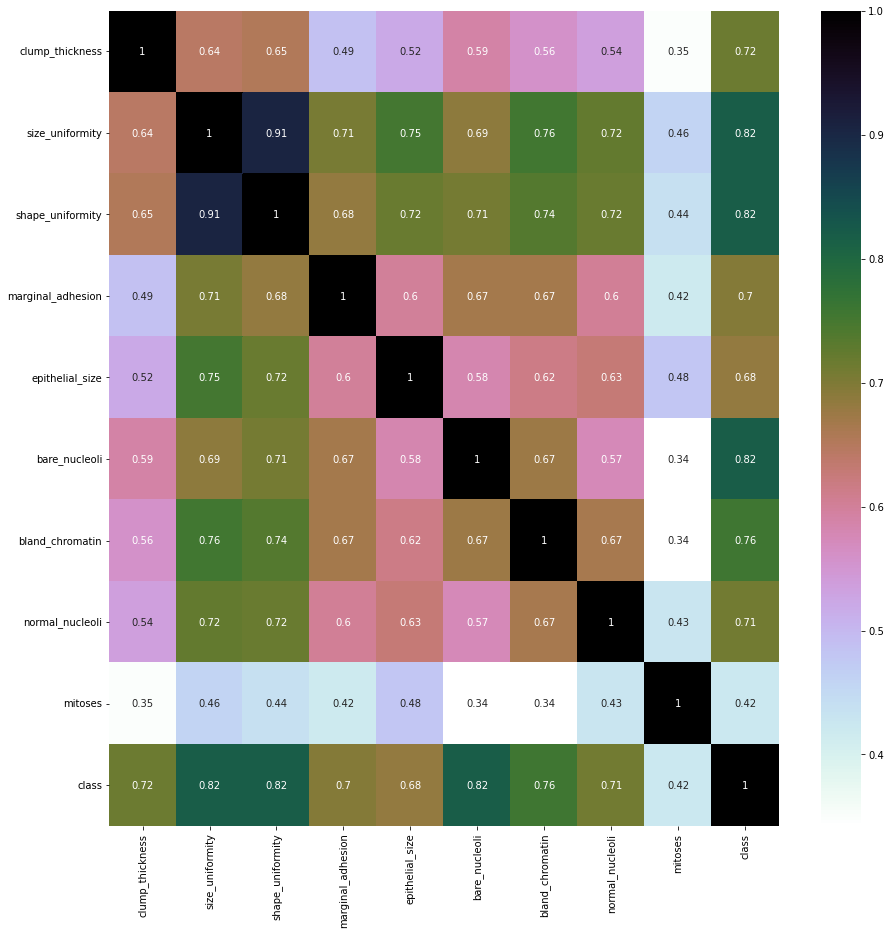

In [30]:
plt.figure(figsize=(15,15)) 
sns.heatmap(br_can_df.drop(columns=['id']).corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

# Modelling

In [31]:
# For Single Classifier Creating function for Confusion Matrix , Precision, Recall and F1 Score
def plot_confusion_matrix(classifier, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    print("\n",classifier,"\n")
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Benign','Malignant']
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))
    return;

In [32]:
#For Single Classifier Creating function to plot precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_prec_rec_curve(classifier, y_test, y_pred):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)

#     print('Average precision-recall score: {0:0.3f}'.format(
#           average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

In [33]:
# Function for Precsion, Recall and F1 Score
def calc_classfier_metric(classifier, y_true, y_pred):
    '''
    Function for Precsion, Recall and F1 Score
    '''
    accuracy      = accuracy_score(y_test, y_pred)
    precision     = precision_score(y_test, y_pred)
    recall        = recall_score(y_test, y_pred)
    F1_score      = f1_score(y_test, y_pred)
    roc_auc_scr   = roc_auc_score(y_test, y_pred)
    conf_mat      = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat;

In [34]:
# Function for Confusion Matrix
def view_confusion_matrix(class_perf_df, columns):
    '''
    Function for Confusion Matrix
    '''
    # rows = int(class_perf_df.shape[0]/ columns)
    rows = int(class_perf_df.shape[0])
    # plt.figure(figsize=(15,13))

    for i in range(class_perf_df.shape[0]):
        plt.subplot(rows,columns,i+1)
        plt.title(class_perf_df['Classifier'].loc[i])
        ax=sns.heatmap(class_perf_df['Conf_Mtrx'].loc[i],
                    annot=True,
                    cmap="coolwarm",
                    fmt="d",
                    cbar=False, 
                    annot_kws={"size": 12},
                    linewidths=1.2,
                    linecolor='w',
                   )
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 10)
        ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)
        ax.set_xlabel('True label') 
        ax.set_ylabel('Predicted label')
    
    return;

In [35]:
# Build Classification Model
def build_class_model(X_train, X_test, y_train, y_test, classifier_model):
    '''
    Functio to Build Classification Model
    '''
    classifier_performance = []
    cnf_lst = []

    for classifier in classifier_model:

        # Fitting the training set into classification model
        classifier.fit(X_train,y_train)

        # Predicting the output on test datset
        y_pred = classifier.predict(X_test)    

        # Cross Validation Score on training test
        scores = cross_val_score(classifier, X_train,y_train, cv=5)
        cv_score_mean = scores.mean()

        # Classification score
        accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat = calc_classfier_metric(classifier, y_test, y_pred)
        classifier_performance.append([classifier.__class__.__name__, cv_score_mean, conf_mat, accuracy, precision, recall, F1_score, roc_auc_scr])

        class_perf_df = pd.DataFrame(classifier_performance, columns=['Classifier', 'Training_CV_Score', 'Conf_Mtrx', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Scr']).sort_values('F1_Score', ascending = False)
    
    return class_perf_df;

In [36]:
# Create Test Train Split
X = br_can_df.drop(columns=['id', 'class'])
y = br_can_df['class']

# #Dividing data into test & train splitting 70% data for training anf 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 559 samples in the training set and 140 samples in the test set


In [41]:
# Machine Learning Model Build
classifier_model = [DummyClassifier(strategy= 'most_frequent', random_state=42),
                    LogisticRegression(random_state=42),
                    SGDClassifier(random_state=42),
                    KNeighborsClassifier(),
                    GaussianNB(),
                    SVC(random_state=42),
                    DecisionTreeClassifier(random_state=42),
                    RandomForestClassifier(random_state=42), 
                    AdaBoostClassifier(random_state=42), 
                    XGBClassifier(objective="binary:logistic", random_state=42),
                    LGBMClassifier(random_state=42)
                   ]

# Call Classification module
class_perf_df = build_class_model(X_train, X_test, y_train, y_test, classifier_model)

# Show Classification Summary
class_perf_df

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Classifier,Training_CV_Score,Conf_Mtrx,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Scr
3,KNeighborsClassifier,0.958816,"[[94, 1], [1, 44]]",0.985714,0.977778,0.977778,0.977778,0.983626
5,SVC,0.967761,"[[93, 2], [2, 43]]",0.971429,0.955556,0.955556,0.955556,0.967251
2,SGDClassifier,0.958816,"[[94, 1], [3, 42]]",0.971429,0.976744,0.933333,0.954545,0.961404
10,LGBMClassifier,0.955228,"[[94, 1], [3, 42]]",0.971429,0.976744,0.933333,0.954545,0.961404
4,GaussianNB,0.958816,"[[91, 4], [1, 44]]",0.964286,0.916667,0.977778,0.946237,0.967836
7,RandomForestClassifier,0.958800,"[[93, 2], [3, 42]]",0.964286,0.954545,0.933333,0.943820,0.956140
1,LogisticRegression,0.962387,"[[94, 1], [5, 40]]",0.957143,0.975610,0.888889,0.930233,0.939181
9,XGBClassifier,0.948069,"[[93, 2], [5, 40]]",0.950000,0.952381,0.888889,0.919540,0.933918
8,AdaBoostClassifier,0.944514,"[[94, 1], [6, 39]]",0.950000,0.975000,0.866667,0.917647,0.928070
6,DecisionTreeClassifier,0.935537,"[[92, 3], [6, 39]]",0.935714,0.928571,0.866667,0.896552,0.917544


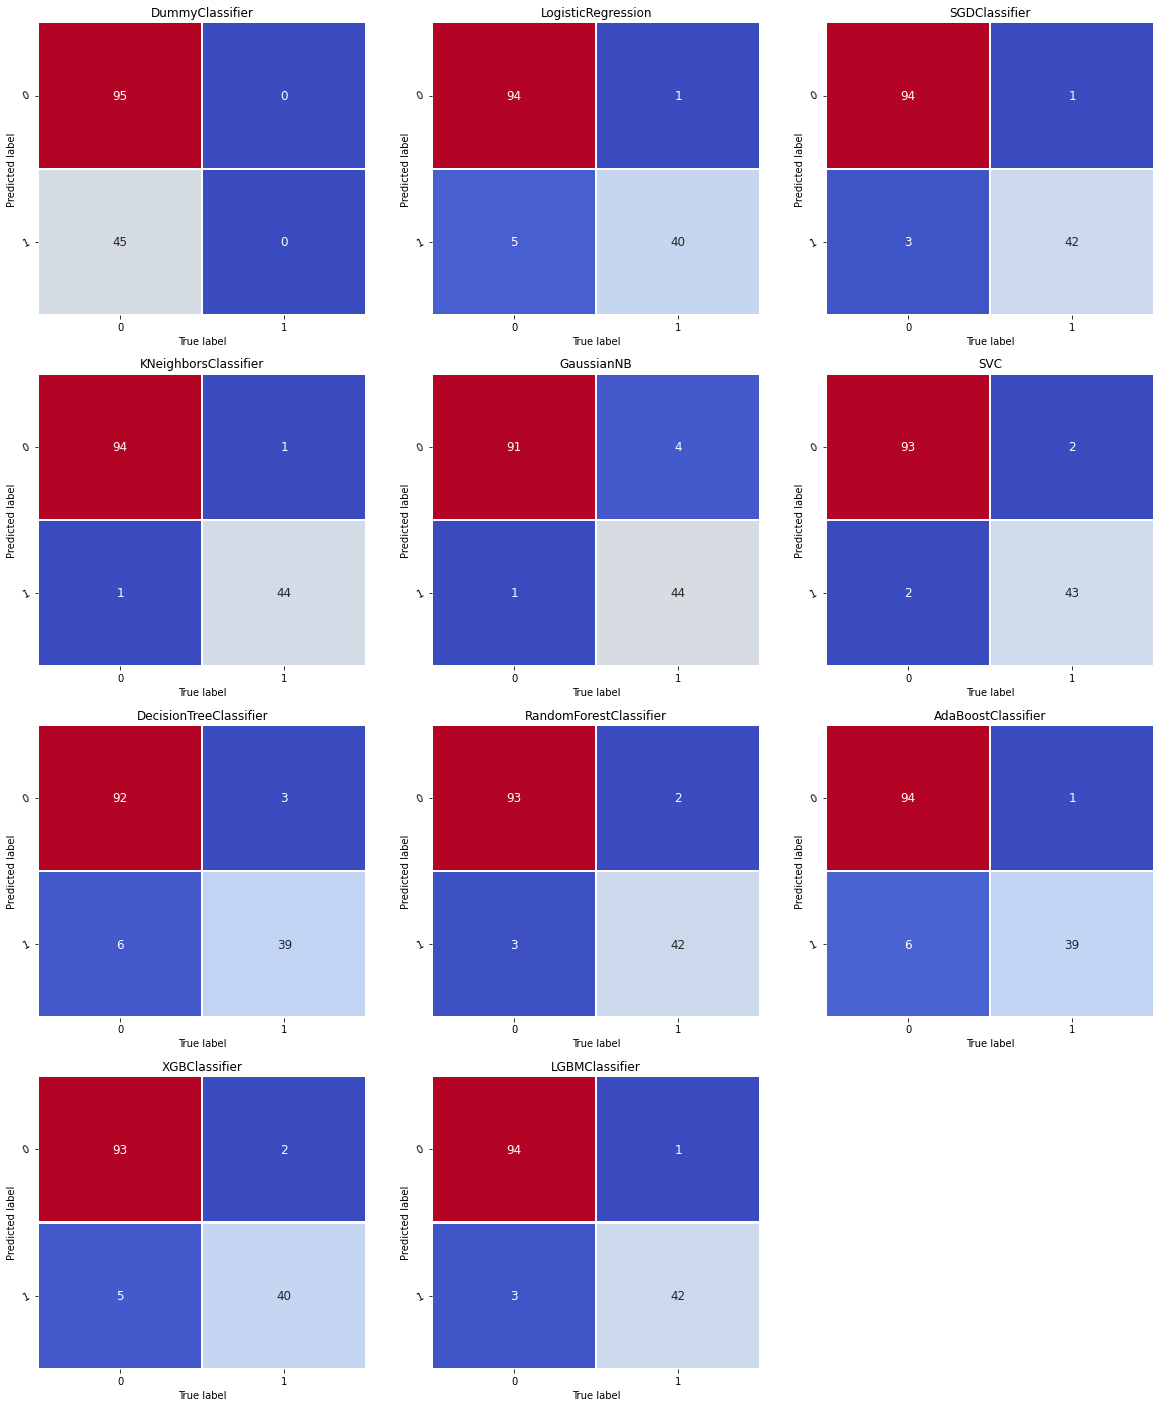

In [43]:
# Show Confusion Matrix
plt.figure(figsize=(20, 70))
view_confusion_matrix(class_perf_df, columns=3)

In [152]:
# Predict
y_pred = classifier_model.predict(X_test)
accuracy      = accuracy_score(y_test, y_pred)
# precision     = precision_score(y_test, y_pred, pos_label=4)
# recall        = recall_score(y_test, y_pred)
# F1_score      = f1_score(y_test, y_pred)
# roc_auc_scr   = roc_auc_score(y_test, y_pred)
conf_mat      = confusion_matrix(y_test, y_pred)
print(accuracy, conf_mat)
# accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat = calc_classfier_metric(classifier_model, np.array(y_test), y_pred)
# print(accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat)

0.9642857142857143 [[93  2]
 [ 3 42]]


In [143]:
np.array(y_test)

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2])